## Problem Statement:

The objective of this project is to build a Convolutional Neural Network (CNN) that can classify images as either "dog" or "cat".

With the growing amount of image data available online, accurate and efficient image classifiers like this can be applied in various areas, such as content filtering, image organization, or even advanced applications like animal tracking.

## Data
The data is hosted on a GitHub repository and consists of:

> **Training set**: A set of labeled images of dogs and cats. This data will be used to train our CNN model.

> **Test set**: A set of labeled images of dogs and cats. This data will be used to evaluate the performance of our trained model.

> **Single Prediction**: One or more images that we'll use to test the prediction capability of our trained model on unseen data.
The images are colored and are to be resized to a shape of (64x64) during preprocessing.

# New Section

# New Section

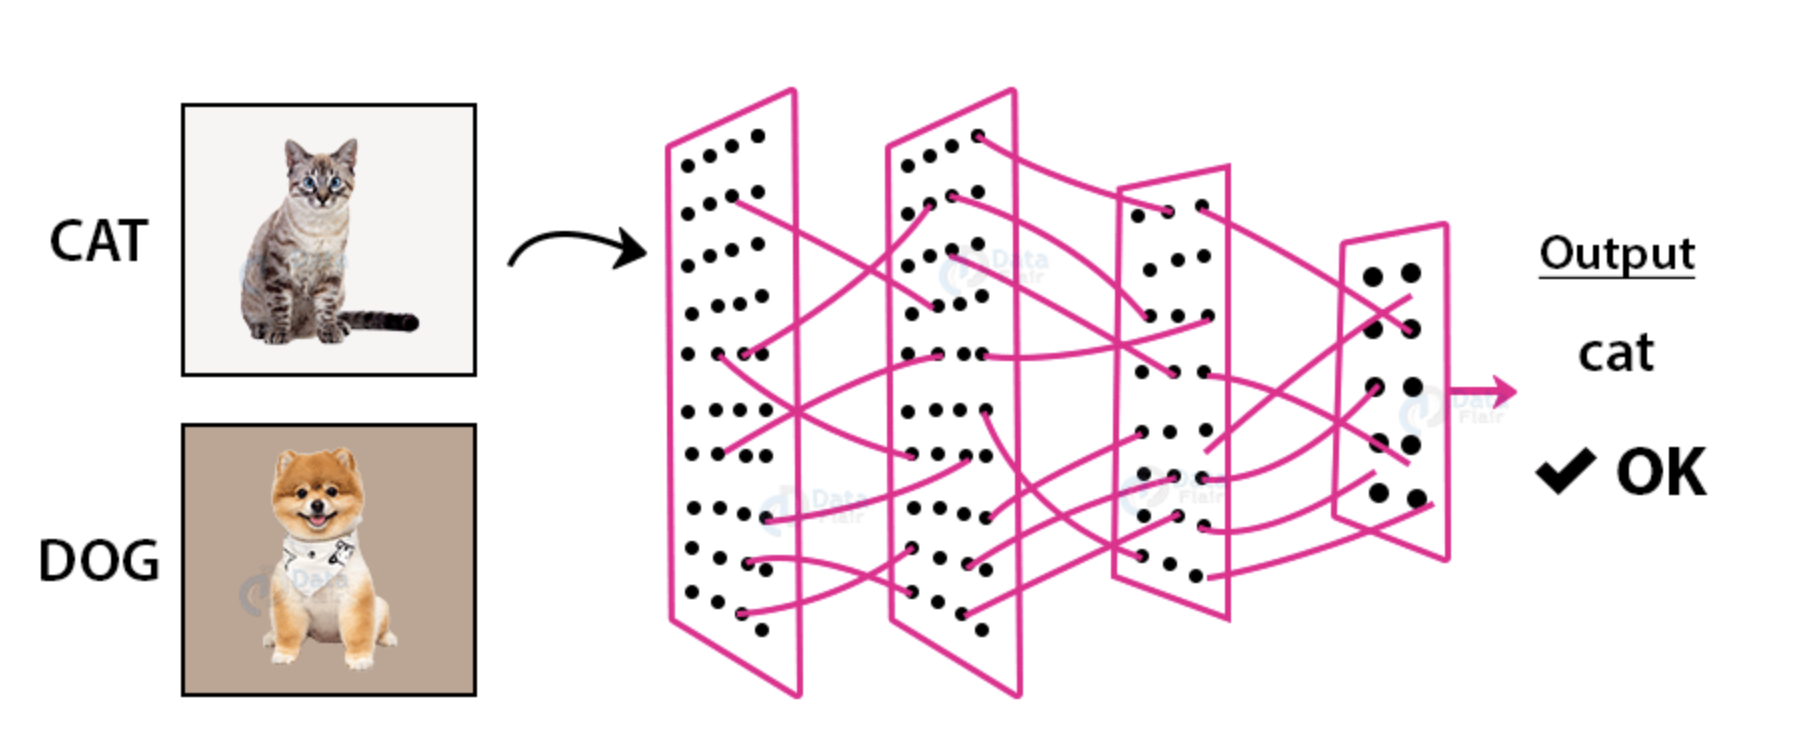

In [2]:
# Importing the libraries
from IPython.display import display, Image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [3]:
pwd

'/content'

In [5]:
# Clone the GitHub repository to fetch the data
!git clone https://github.com/alokproc/Dog-or-Cat-Prediction-using-CNN-Model.git
!ls Dog-or-Cat_Prediction-using-CNN-Model

Cloning into 'Dog-or-Cat-Prediction-using-CNN-Model'...
remote: Enumerating objects: 10024, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10024 (delta 1), reused 1 (delta 0), pack-reused 10018
Receiving objects: 100% (10024/10024), 216.40 MiB | 25.20 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (10008/10008), done.
ls: cannot access 'Dog-or-Cat_Prediction-using-CNN-Model': No such file or directory


In [ ]:
# Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
training_set = train_datagen.flow_from_directory(
    'Dog-or-Cat-Prediction-using-CNN-Model/dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


In [ ]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale=1/255)
test_set = test_datagen.flow_from_directory(
    'Dog-or-Cat-Prediction-using-CNN-Model/dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
# Building the CNN

cnn = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(2),

    # Second convolutional layer
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    # Flattening
    tf.keras.layers.Flatten(),

    # Full Connection
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(training_set, validation_data=test_set, epochs=10)  # Assuming 25 epochs for training

Epoch 1/10
250/250 [==============================] - 57s 224ms/step - loss: 0.6685 - accuracy: 0.5788 - val_loss: 0.6681 - val_accuracy: 0.5985
Epoch 2/10
250/250 [==============================] - 60s 239ms/step - loss: 0.5983 - accuracy: 0.6800 - val_loss: 0.5538 - val_accuracy: 0.7205
Epoch 3/10
250/250 [==============================] - 54s 217ms/step - loss: 0.5516 - accuracy: 0.7196 - val_loss: 0.5245 - val_accuracy: 0.7340
Epoch 4/10
250/250 [==============================] - 56s 223ms/step - loss: 0.5220 - accuracy: 0.7390 - val_loss: 0.5114 - val_accuracy: 0.7505
Epoch 5/10
250/250 [==============================] - 60s 242ms/step - loss: 0.5011 - accuracy: 0.7577 - val_loss: 0.5204 - val_accuracy: 0.7430
Epoch 6/10
250/250 [==============================] - 55s 218ms/step - loss: 0.4897 - accuracy: 0.7621 - val_loss: 0.4824 - val_accuracy: 0.7635
Epoch 7/10
250/250 [==============================] - 55s 221ms/step - loss: 0.4712 - accuracy: 0.7778 - val_loss: 0.4652 - val_ac

In [ ]:
# Making a single prediction
def predict_single_image(img_path):
    test_image = tf.keras.utils.load_img(img_path, target_size=(64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn.predict(test_image)
    if result[0][0] == 1:
        return 'dog'
    else:
        return 'cat'

In [ ]:
img_path = 'Dog-or-Cat-Prediction-using-CNN-Model/dataset/single_prediction/cat_or_dog_1.jpg'
print(predict_single_image(img_path))

1/1 [==============================] - 0s 172ms/step
dog
